In [1]:
import numpy as np
import pandas as pd
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import rv_discrete
import random

def remove_links(graph_dic,edge_number):
    count = 1
    V,U = '',' '
    for item in temp.items():
        for node in item[1].items():
            if count==edge_number:
                V = item[0]
                U = node[0]
                del graph_dic[V][U]
                break
            count+=1
    
    return graph_dic

def select_random_edges(prob,edges,graph_dic):
    tot_edges = total_edges_in_graph(graph_dic)
    edges = np.arange(1,tot_edges+1,1)
    k = int (prob * 100)
    return random.sample(list(edges),k)

def correct_throughput(TH, C=1):
    for i in range(4):
        TH[i] =  ((i+1) * C ) / TH[i]
    return TH

def calculate_through_put (graph,n,l,C=1):
    L_ij = np.matrix(np.zeros(shape=(n,n),dtype=float))
    Rs_uv = np.matrix(np.zeros(shape=(n,n),dtype=float))
    for i in range(n):
        for j in range(n):
            L_ij[i,j]=len(use_k_shortest_path(i,j,graph,l))
    Pathes = []
    for i in range(n):
        for j in range(n):
            Pathes.append(use_k_shortest_path(i,j,graph,l))
    for element in Pathes:
        for lists in element:
            i = lists[0]
            j = lists[len(lists)-1]
            for u in range(n):
                for v in range(n):
                    if str(u) in lists:
                        if str(v) in lists:
                            Rs_uv[u,v]=Rs_uv[u,v]+1/L_ij[i,j]
                            break
    return np.max(Rs_uv)

def delete_edges(number,graph):
    temp = {}
    for item in graph.items():
        key = item[0]
        temp[str(key)] =(item[1])
    count = 0
    for item in temp.items():
        for specific_edge in item[1]:
            count+=1
            if count==number:
                del temp[str(item[0])][str(specific_edge)]
                break
    return temp 



def total_edges_in_graph(random_graph):
    counter = 0
    for item in random_graph.items():
        for node in item[1].items():
            counter+=1
    return counter

'''Helper Function , Converting from ASCII'''
def convert_to_numbers(string):
    t = []
    for character in string:
        number =  ord(character)
        number = number-65
        t.append(str(number))
    return t

def con_list(lis):
    b = {}
    for element in lis:
        b[chr(int(element)+65)]=1
    return b
'''Convert the Graph into Character'''
def convert_graph(g):
    temp = {}
    for item in g.items():
        character =  chr(65+int (item[0]))
        connected = list(item[1])
        connected = con_list(connected)
        temp[character] = connected
    return temp

def gen_r_a_graph(nodes,r):
    
    if ((nodes*r)%2)!=0:
        return 'error'
    if r > nodes:
        return 'error'
    
    graph_matrix=np.zeros([nodes,nodes])
    graph_dct={}
    for i in range(nodes):
        graph_dct[i]=set()
    
    while(if_equal(graph_dct,list(range(nodes)),r)!=True):

        for i in range(nodes):
            
            filled_elements=get_filled_elements(graph_dct,r)
            lst=list(range(nodes))
            lst.remove(i)
            
            
            for elmnt in filled_elements:
                try:
                    lst.remove(elmnt)
                except:
                    return('a')
                

        
        
            count=0
            #if (len(lst)<=abs(r-len(graph_dct[i]))):
            while True:
                count=count+1
                #print('list and size',lst,abs(r-len(graph_dct[i])))
                try:
                    sample_list=random.sample(lst,abs(r-len(graph_dct[i])))
                except:
                    return('a')
                    #gen_r_graph(nodes,r)
                if if_empty(graph_dct,sample_list,r)==True:
                    ch=sample_list
                    break
                else:
                    if count > 100:
                        break
                    else:
                        pass
            
            
            #print('sample_list',sample_list)
            if count > 100:
                return 'try different combination of nodes and degree'
            
            graph_dct[i].update(set(sample_list))
            for s in sample_list:
                graph_dct[s].update(set([i]))
            
            #print('dict',graph_dct)
            if if_equal(graph_dct,list(range(nodes)),r)==True:
                #print('below')
                return graph_dct

            

            
            
def get_filled_elements(dct,r):
    val_list=[]
    for key in dct.keys():
        if len(dct[key]) == r:
            val_list.append(key)
    return val_list

def if_empty(dct,sample_list,r):
    
    for sample in sample_list:
        if len(dct[sample]) >= r:
            return False
    
    return True
            
def if_equal(dct,sample_list,r):
    
    for sample in sample_list:
        if len(dct[sample]) != r:
            return False
        
    return True


def create_r_graph(nodes,r):
    while True:
        dct=gen_r_a_graph(nodes,r)
        if dct!='a':
            break
    
    #build dictionary 
    
    graph_matrix=np.zeros([nodes,nodes])
    
    for i in range(nodes):
        
        col_indices=list(dct[i])
        for col in col_indices:
            graph_matrix[i,col]=1
    return graph_matrix,dct




def create_dictionary(graph):
    D = {}
    for item in graph.items():
        temp = {}
        connected = list(item[1])
        key = item[0]
        for V in connected:
            temp[str(V)] = 1
        D[str(key)] = temp
    return D

def gen_p_graph(nodes,prob):
    if prob>1:
        er='error'
        return er
    graph_matrix=np.zeros([nodes,nodes])
    num_of_connections=int(((nodes * (nodes-1)) * prob  )/2)
    num_list_row=list(range(nodes-1))
    while(np.sum(np.triu(graph_matrix))!=num_of_connections):
            row_num=random.choice(num_list_row)
            num_list_col=(list(range(row_num+1,nodes)))
            col_num=random.choice(num_list_col)
            if graph_matrix[row_num,col_num]==0:
                graph_matrix[row_num,col_num]=1
                graph_matrix[col_num,row_num]=1
        
    #create dictionary
    df=pd.DataFrame(np.argwhere(graph_matrix==1))
    arr=np.unique(df.iloc[:,0])
    dct={}
    for i in range(graph_matrix.shape[0]):
        dct[str(i)]=set()
    for val in arr:
        dct[str(val)].update(df.loc[df.iloc[:,0]==val].iloc[:,1].values)
        
    return pd.DataFrame(graph_matrix),dct

'''K Shortest Path Initialization'''
def K_shortest_Paths(graph,S,T,K=4):
    '''Initialize Variables Accordingly'''
    B = {}
    P = set()
    count = {}
    for U in graph.keys():
        count[U] = 0 
    B[S] = 0 
    '''Algorithm Starts'''
    while(len(B)>=1 and count[T]<K):
        PU = min(B,key=lambda x:B[x])
        cost = B[PU]
        U_node = PU[len(PU)-1]
        del B[PU]
        count[U_node] += 1 
        if U_node==T:
            P.add(PU)
        if count[U_node]<=K:
            V = graph[U_node].keys()
            for v in V:
                if v not in PU:
                    PV = PU+v
                    B[PV] = cost+1        
    return P

def use_k_shortest_path(S,T,graph,l=4):
    S = chr(S+65)
    T = chr(T+65)
    lists = list(K_shortest_Paths(graph,S,T,l))
    Paths = []
    for element in lists:
        Paths.append(convert_to_numbers(element))
    return Paths

In [18]:
'''Create a P random Graph and Find Shortest Path'''
n = 100
p = 8/(n-1)
S = 73
T = 10
matrix,graph = gen_p_graph(n,p)
graph= create_dictionary(graph)
graph = convert_graph(graph)
use_k_shortest_path(S,T,graph)

[['73', '72', '43', '38', '10'],
 ['73', '19', '47', '10'],
 ['73', '78', '23', '47', '10'],
 ['73', '94', '38', '10'],
 ['73', '99', '91', '38', '10'],
 ['73', '82', '91', '47', '10']]

In [26]:
'''Create an r random Graph and Find Shortest Path'''
n = 40
r = 8
S = 39
T = 38
graph= create_dictionary(create_r_graph(n,r)[1])
graph = convert_graph(graph)
use_k_shortest_path(S,T,graph)

[['39', '14', '5', '38'],
 ['39', '18', '38'],
 ['39', '10', '12', '38'],
 ['39', '16', '38']]

C:\Users\conne\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:318: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  out = N.ndarray.__getitem__(self, index)


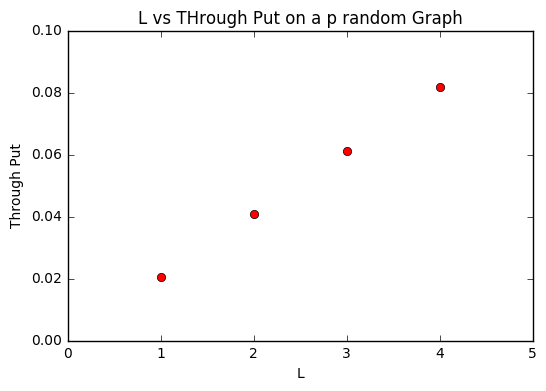

In [27]:
'''ThroughPut Performance for P-ER Graph'''
C= 1
L = [1,2,3,4]
TH1 = []
n = 20
p = 8/(n-1)
graph= create_dictionary(gen_p_graph(n,p)[1])
graph = convert_graph(graph)
for i in range(4):
    TH1.append(calculate_through_put(graph,n,L[0],C))
for i in range(4):
    TH1[i] =  ((i+1) * C ) / TH1[i]
plt.plot(L,TH1,'ro')
plt.xlabel('L')
plt.ylabel('Through Put')
plt.axis([0,5,0.0,0.1])
plt.title('L vs THrough Put on a p random Graph')
plt.show()

C:\Users\conne\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:318: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  out = N.ndarray.__getitem__(self, index)


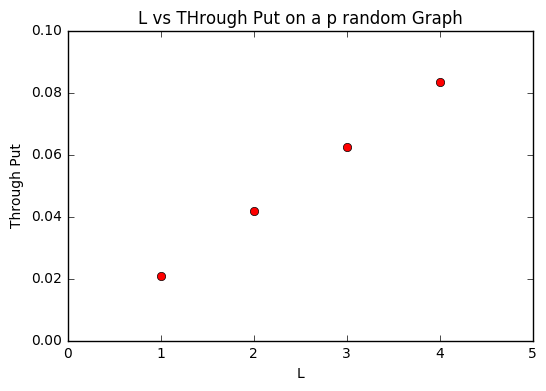

In [30]:
'''Through Put of r-regular Graph'''
C= 1
L = [1,2,3,4]
TH1 = []
n = 20
r = 8
graph= create_dictionary(create_r_graph(n,r)[1])
graph = convert_graph(graph)
for i in range(4):
    TH1.append(calculate_through_put(graph,n,L[0],C))
for i in range(4):
    TH1[i] =  ((i+1) * C ) / TH1[i]
plt.plot(L,TH1,'ro')
plt.xlabel('L')
plt.ylabel('Through Put')
plt.axis([0,5,0.0,0.1])
plt.title('L vs THrough Put on a p random Graph')
plt.show()

C:\Users\conne\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:318: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  out = N.ndarray.__getitem__(self, index)


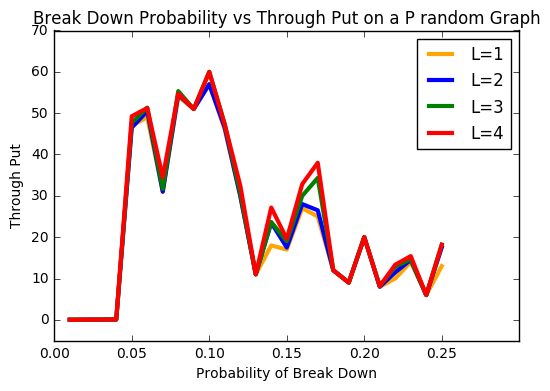

In [33]:
'''Create the P-ER Graph and Randomly Select the Edges to be Removed While L=4,3,2,1'''
Through_Put4 = []
graph= create_dictionary(gen_p_graph(20,0.3)[1])
Prob = np.arange(0.01,0.26,0.01)
tot_edges = total_edges_in_graph(graph)
edges = np.arange(1,tot_edges+1,1)
indices = []
temp=copy.deepcopy(graph)
for P in Prob:
    indices.append(select_random_edges(P,edges,temp))
for index in indices:
    temp=copy.deepcopy(graph)
    for value in index:
        temp = remove_links(temp,value)
    temp = convert_graph(temp)
    Through_Put4.append(calculate_through_put(temp,20,4))
'''L=3'''
Through_Put3 = []
for index in indices:
    temp=copy.deepcopy(graph)
    for value in index:
        temp = remove_links(temp,value)
    temp = convert_graph(temp)
    Through_Put3.append(calculate_through_put(temp,20,3))
'''L=2'''
Through_Put2 = []
for index in indices:
    temp=copy.deepcopy(graph)
    for value in index:
        temp = remove_links(temp,value)
    temp = convert_graph(temp)
    Through_Put2.append(calculate_through_put(temp,20,2))
'''L=1'''
Through_Put1 = []
for index in indices:
    temp=copy.deepcopy(graph)
    for value in index:
        temp = remove_links(temp,value)
    temp = convert_graph(temp)
    Through_Put1.append(calculate_through_put(temp,20,1))
    
Through_Put1 = correct_throughput(Through_Put1)
Through_Put2 = correct_throughput(Through_Put2)
Through_Put3 = correct_throughput(Through_Put3)
Through_Put4 = correct_throughput(Through_Put4)
plt.plot(Prob,Through_Put1,linewidth=3,color='orange')
plt.plot(Prob,Through_Put2,linewidth=3,color ='blue')
plt.plot(Prob,Through_Put3,linewidth=3,color = 'green')
plt.plot(Prob,Through_Put4,linewidth=3,color ='red')
plt.xlabel('Probability of Break Down')
plt.legend(['L=1','L=2','L=3','L=4'],loc='upper right')
plt.ylabel('Through Put')
plt.title('Break Down Probability vs Through Put on a P random Graph')
plt.axis([0,0.30,-5,70])
plt.show()

C:\Users\conne\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:318: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  out = N.ndarray.__getitem__(self, index)


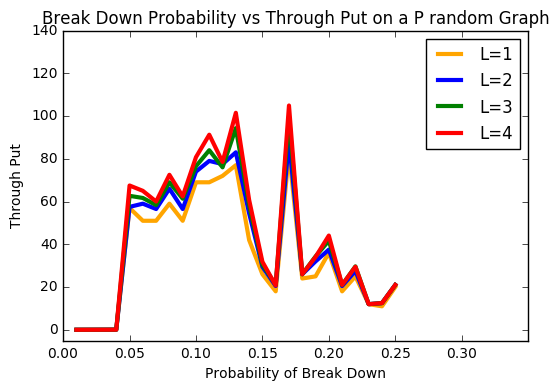

In [34]:
'''Create the P Graph and Randomly Select the Edges to be Removed While L=4,3,2,1'''
Through_Put4 = []
graph= create_dictionary(create_r_graph(20,8)[1])
Prob = np.arange(0.01,0.26,0.01)
tot_edges = total_edges_in_graph(graph)
edges = np.arange(1,tot_edges+1,1)
indices = []
temp=copy.deepcopy(graph)
for P in Prob:
    indices.append(select_random_edges(P,edges,temp))
for index in indices:
    temp=copy.deepcopy(graph)
    for value in index:
        temp = remove_links(temp,value)
    temp = convert_graph(temp)
    Through_Put4.append(calculate_through_put(temp,20,4))
'''L=3'''
Through_Put3 = []
for index in indices:
    temp=copy.deepcopy(graph)
    for value in index:
        temp = remove_links(temp,value)
    temp = convert_graph(temp)
    Through_Put3.append(calculate_through_put(temp,20,3))
'''L=2'''
Through_Put2 = []
for index in indices:
    temp=copy.deepcopy(graph)
    for value in index:
        temp = remove_links(temp,value)
    temp = convert_graph(temp)
    Through_Put2.append(calculate_through_put(temp,20,2))
'''L=1'''
Through_Put1 = []
for index in indices:
    temp=copy.deepcopy(graph)
    for value in index:
        temp = remove_links(temp,value)
    temp = convert_graph(temp)
    Through_Put1.append(calculate_through_put(temp,20,1))
    
Through_Put1 = correct_throughput(Through_Put1)
Through_Put2 = correct_throughput(Through_Put2)
Through_Put3 = correct_throughput(Through_Put3)
Through_Put4 = correct_throughput(Through_Put4)
plt.plot(Prob,Through_Put1,linewidth=3,color='orange')
plt.plot(Prob,Through_Put2,linewidth=3,color ='blue')
plt.plot(Prob,Through_Put3,linewidth=3,color = 'green')
plt.plot(Prob,Through_Put4,linewidth=3,color ='red')
plt.xlabel('Probability of Break Down')
plt.legend(['L=1','L=2','L=3','L=4'],loc='upper right')
plt.ylabel('Through Put')
plt.title('Break Down Probability vs Through Put on a P random Graph')
plt.axis([0,0.35,-5,140])
plt.show()